In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd


# Loading the dataset
train_data_dir = 'C:/Users/docmantis/Documents/JupyterLab/Practice/pet_person_data/train'
test_data_dir = 'C:/Users/docmantis/Documents/JupyterLab/Practice/pet_person_data/test'

# Data augmentation for training data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# Data augmentation for testing data
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow the training data
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(224,224),
                                                    batch_size=32,
                                                    class_mode='binary')

# Flow the testing data
test_generator = test_datagen.flow_from_directory(test_data_dir,
                                                  target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode='binary')

# Build CNN
with tf.device('/cpu:0'):
    model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Fit model with the training data
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(train_generator,
                    epochs=100,
                    validation_data=test_generator,
                    callbacks=[early_stop])

# Model Summary
model.summary()

# Model Evaluation
_, acc = model.evaluate(test_generator)
print('Test Accuracy:', acc)

# Confusion Matrix
y_pred = model.predict(test_generator)
y_pred = [np.round(x[0]) for x in y_pred]
y_test = test_generator.classes
cm = confusion_matrix(y_test, y_pred)
df = pd.DataFrame(cm, index = ['pet', 'person'], columns = ['pet', 'person'])
print(df)

# Predict on new data
predictions = model.predict(test_generator)


Found 1200 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Epoch 1/100
38/38 [==============================] - 36s 933ms/step - loss: 0.7214 - accuracy: 0.5200 - val_loss: 0.6212 - val_accuracy: 0.5450
Epoch 2/100
38/38 [==============================] - 35s 927ms/step - loss: 0.5941 - accuracy: 0.7075 - val_loss: 0.5235 - val_accuracy: 0.7800
Epoch 3/100
38/38 [==============================] - 35s 925ms/step - loss: 0.4974 - accuracy: 0.7683 - val_loss: 0.4657 - val_accuracy: 0.7975
Epoch 4/100
38/38 [==============================] - 35s 924ms/step - loss: 0.4608 - accuracy: 0.7808 - val_loss: 0.4505 - val_accuracy: 0.7900
Epoch 5/100
38/38 [==============================] - 35s 916ms/step - loss: 0.4272 - accuracy: 0.8100 - val_loss: 0.4957 - val_accuracy: 0.7650
Epoch 6/100
38/38 [==============================] - 35s 917ms/step - loss: 0.3863 - accuracy: 0.8317 - val_loss: 0.3480 - val_accuracy: 0.8325
Epoch 7/100
38/38 [==============================] - 

In [2]:
precision = sklearn.metrics.precision_score(y_test, y_pred)
recall = sklearn.metrics.recall_score(y_test, y_pred)
f1 = sklearn.metrics.f1_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Precision: 0.49295774647887325
Recall: 0.525
F1 score: 0.5084745762711863


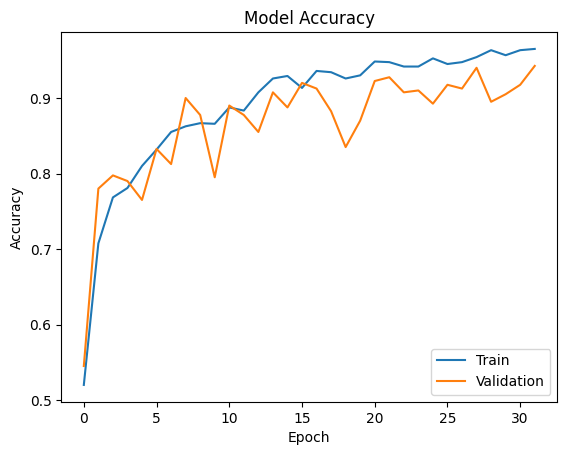

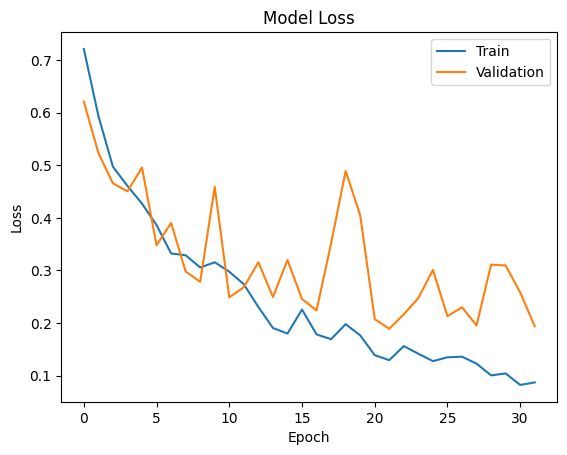

In [3]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

1/1 [==============================] - 0s 208ms/step


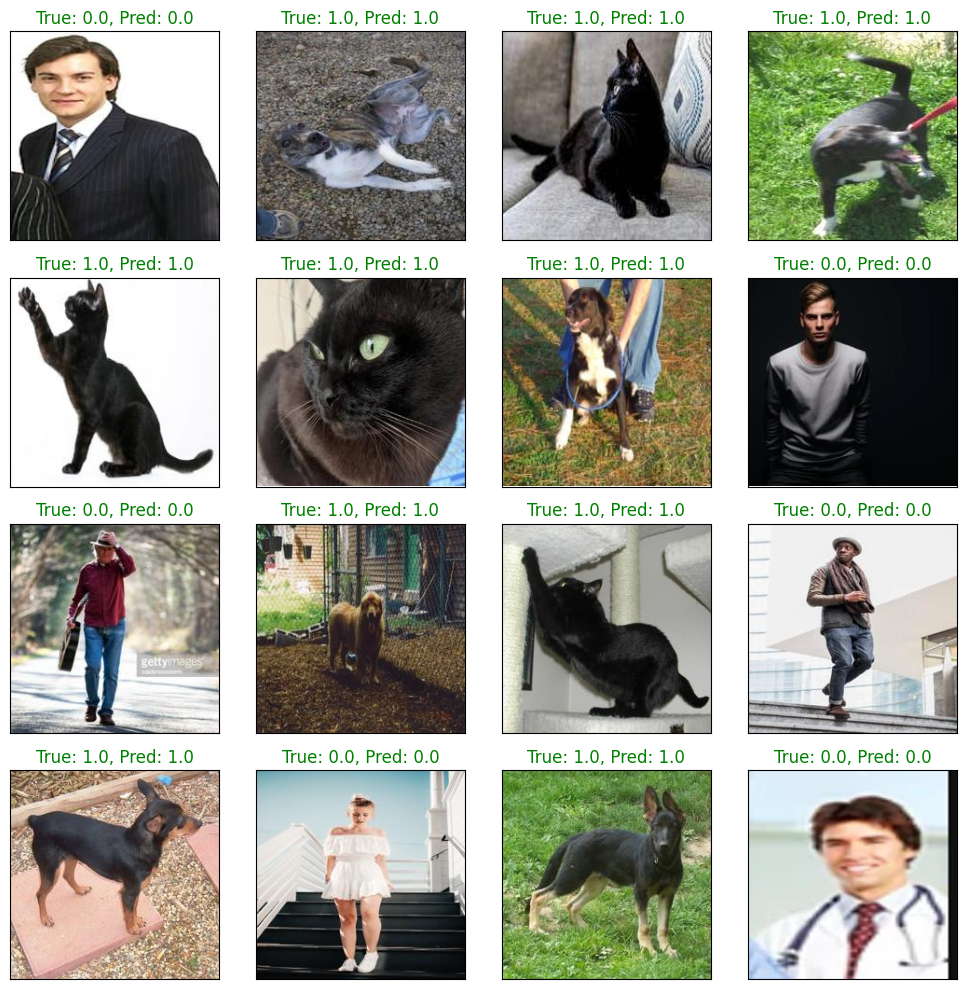

In [4]:
# Get some test images and their corresponding labels
test_images, test_labels = next(test_generator)

# Make predictions on the test images
preds = model.predict(test_images)

# Plot the test images with their predicted labels
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    # Get the true label and predicted label
    true_label = test_labels[i]
    pred_label = np.round(preds[i][0])

    # Determine the color of the predicted label text based on whether the prediction is correct or not
    if true_label == pred_label:
        color = 'green'
    else:
        color = 'red'

    # Display the image with its true and predicted label
    ax.imshow(test_images[i])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"True: {true_label}, Pred: {pred_label}", color=color)

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 174ms/step


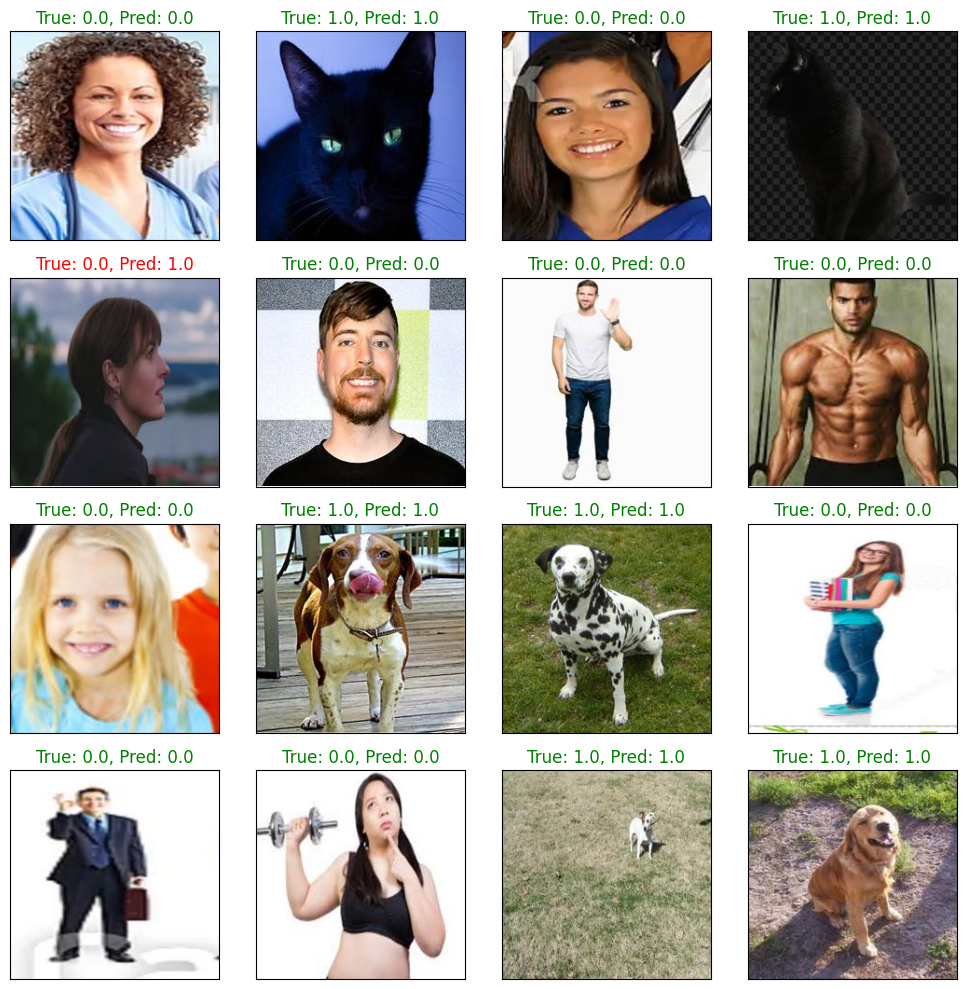

In [5]:
# Get some test images and their corresponding labels
test_images, test_labels = next(test_generator)

# Make predictions on the test images
preds = model.predict(test_images)

# Plot the test images with their predicted labels
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    # Get the true label and predicted label
    true_label = test_labels[i]
    pred_label = np.round(preds[i][0])

    # Determine the color of the predicted label text based on whether the prediction is correct or not
    if true_label == pred_label:
        color = 'green'
    else:
        color = 'red'

    # Display the image with its true and predicted label
    ax.imshow(test_images[i])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"True: {true_label}, Pred: {pred_label}", color=color)

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 174ms/step


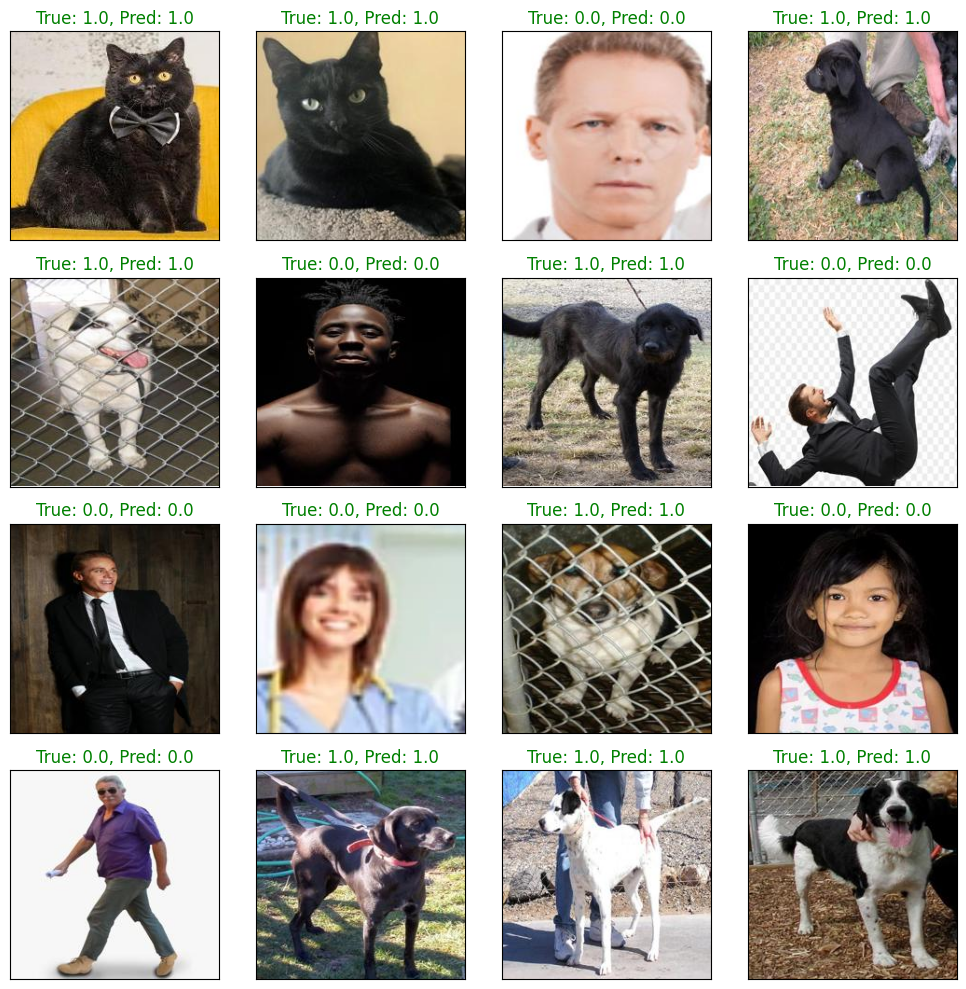

In [7]:
# Get some test images and their corresponding labels
test_images, test_labels = next(test_generator)

# Make predictions on the test images
preds = model.predict(test_images)

# Plot the test images with their predicted labels
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    # Get the true label and predicted label
    true_label = test_labels[i]
    pred_label = np.round(preds[i][0])

    # Determine the color of the predicted label text based on whether the prediction is correct or not
    if true_label == pred_label:
        color = 'green'
    else:
        color = 'red'

    # Display the image with its true and predicted label
    ax.imshow(test_images[i])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"True: {true_label}, Pred: {pred_label}", color=color)

plt.tight_layout()
plt.show()

In [6]:
# SAVE MODEL
model.save('C:/Users/docmantis/Documents/JupyterLab/Practice/pet_person_model.h5')

In [8]:
from tensorflow.keras.callbacks import TensorBoard
from datetime import datetime

# Create a TensorBoard callback
log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Fit model with the training data
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(train_generator,
                    epochs=15,
                    validation_data=test_generator,
                    callbacks=[early_stop, tensorboard_callback])

Epoch 1/15
38/38 [==============================] - 36s 948ms/step - loss: 0.0539 - accuracy: 0.9767 - val_loss: 0.4756 - val_accuracy: 0.8850
Epoch 2/15
38/38 [==============================] - 37s 964ms/step - loss: 0.1094 - accuracy: 0.9600 - val_loss: 0.3415 - val_accuracy: 0.9025
Epoch 3/15
38/38 [==============================] - 36s 948ms/step - loss: 0.0769 - accuracy: 0.9758 - val_loss: 0.3478 - val_accuracy: 0.9100
Epoch 4/15
38/38 [==============================] - 36s 955ms/step - loss: 0.0883 - accuracy: 0.9708 - val_loss: 0.6325 - val_accuracy: 0.8700
Epoch 5/15
38/38 [==============================] - 37s 959ms/step - loss: 0.0860 - accuracy: 0.9692 - val_loss: 0.3172 - val_accuracy: 0.9225
Epoch 6/15
38/38 [==============================] - 36s 951ms/step - loss: 0.0768 - accuracy: 0.9717 - val_loss: 0.2765 - val_accuracy: 0.9200
Epoch 7/15
38/38 [==============================] - 37s 968ms/step - loss: 0.0380 - accuracy: 0.9858 - val_loss: 0.3593 - val_accuracy: 0.9225

In [ ]:
# INSERT THIS INTO COMMAND LINE TO LAUNCH TENSORBOARD
tensorboard --logdir logs/fit